In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as px
from imblearn.over_sampling import SMOTE



from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import os

from sklearn.metrics import classification_report,confusion_matrix,f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Exploratory Data Analysis

<Axes: xlabel='gender', ylabel='count'>

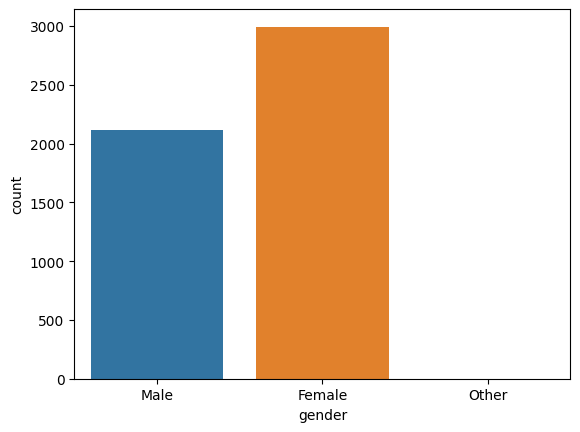

In [4]:
sns.countplot(data = df, x= 'gender')

<Axes: xlabel='hypertension', ylabel='count'>

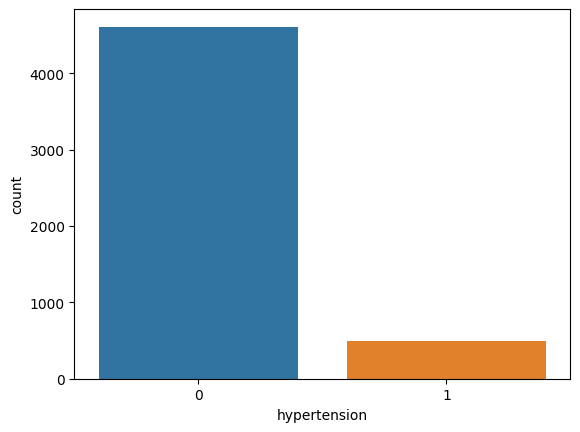

In [5]:
sns.countplot(data = df, x= 'hypertension')

<Axes: xlabel='heart_disease', ylabel='count'>

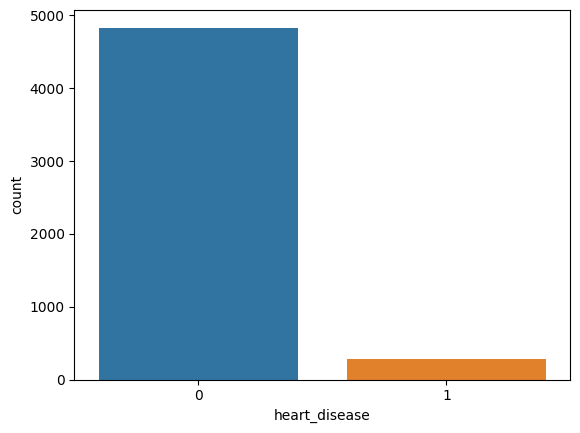

In [6]:
sns.countplot(data = df, x= 'heart_disease')

<Axes: xlabel='ever_married', ylabel='count'>

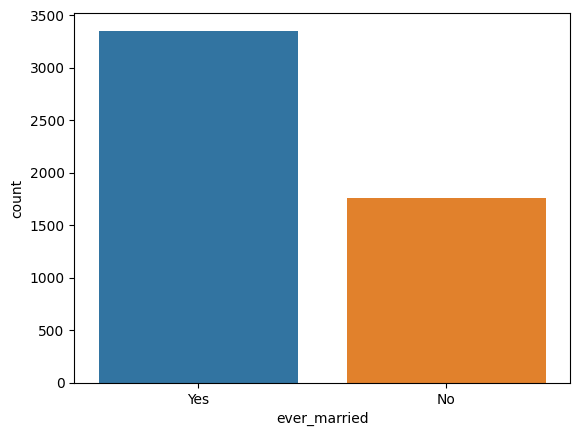

In [7]:
sns.countplot(data = df, x= 'ever_married')

<Axes: xlabel='work_type', ylabel='count'>

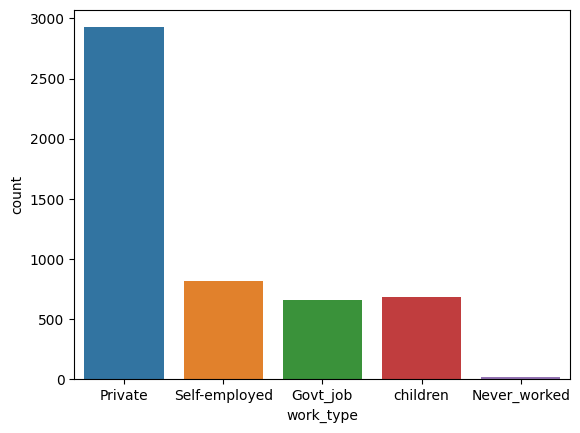

In [8]:
sns.countplot(data = df, x= 'work_type')

In [9]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<Axes: xlabel='Residence_type', ylabel='count'>

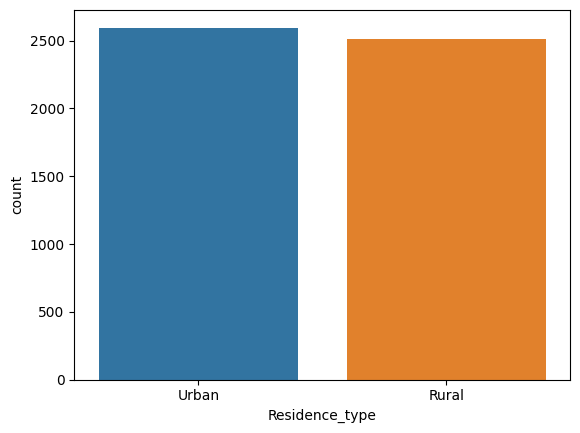

In [10]:
sns.countplot(data = df, x= 'Residence_type')

<Axes: xlabel='smoking_status', ylabel='count'>

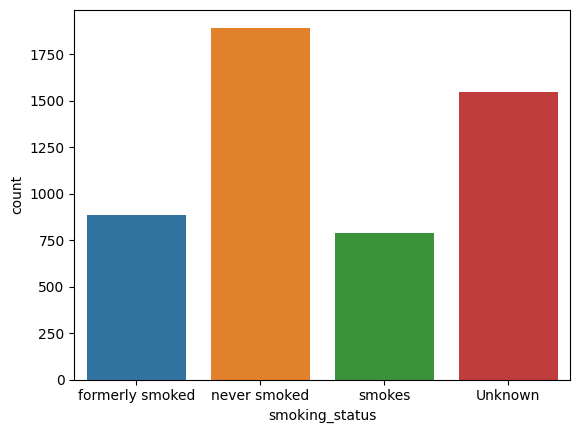

In [11]:
sns.countplot(data = df, x= 'smoking_status')

<Axes: xlabel='age', ylabel='Density'>

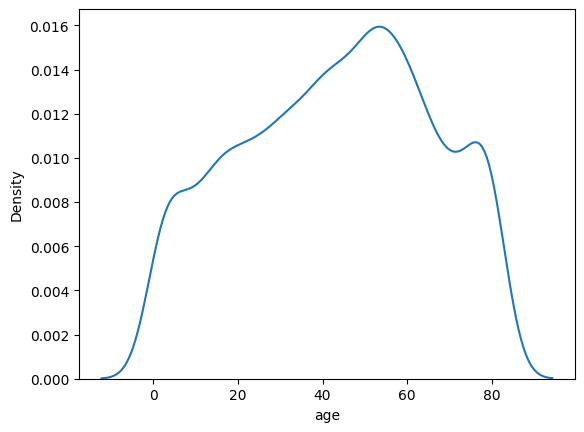

In [12]:
sns.kdeplot(df['age'])

<Axes: xlabel='bmi', ylabel='Density'>

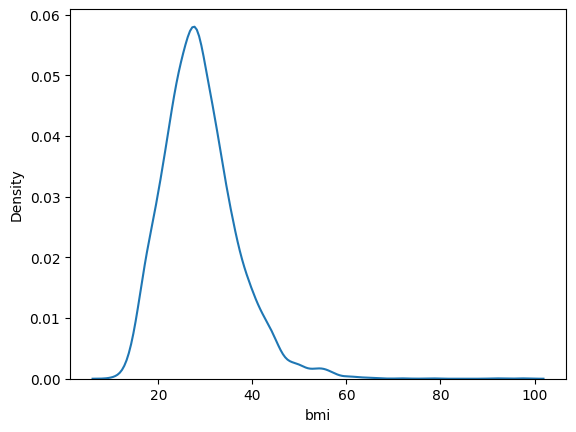

In [13]:
sns.kdeplot(df['bmi'])

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

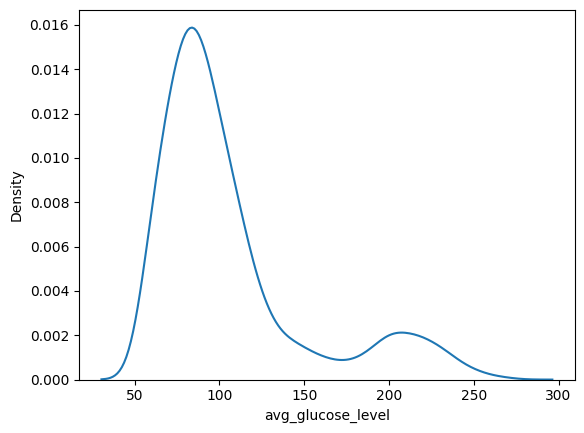

In [14]:
sns.kdeplot(df['avg_glucose_level'])

In [15]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<Axes: xlabel='age', ylabel='Density'>

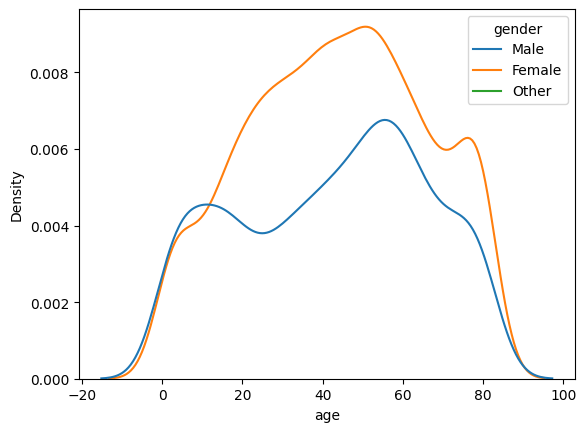

In [16]:
sns.kdeplot(x = df['age'],hue=df['gender'])

<Axes: xlabel='bmi', ylabel='Density'>

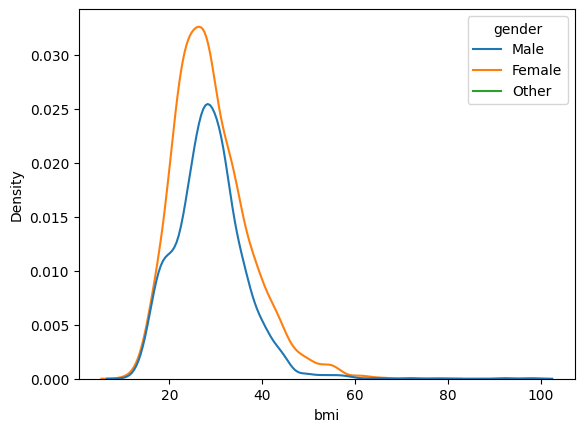

In [17]:
sns.kdeplot(x = df['bmi'],hue=df['gender'])

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

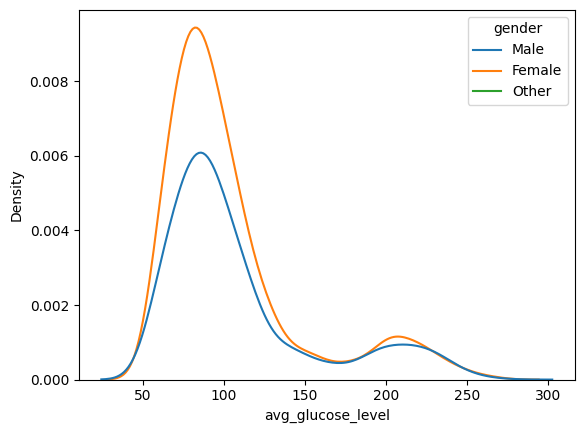

In [18]:
sns.kdeplot(x = df['avg_glucose_level'],hue=df['gender'])

<Axes: xlabel='hypertension', ylabel='count'>

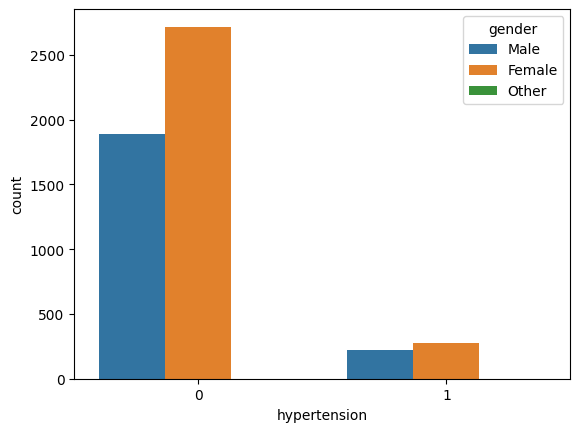

In [19]:
sns.countplot(data =df,x = 'hypertension',hue = 'gender')

<Axes: xlabel='heart_disease', ylabel='count'>

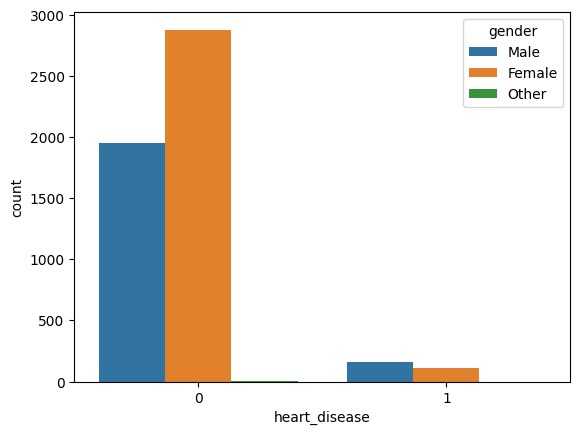

In [20]:
sns.countplot(data =df,x = 'heart_disease',hue = 'gender')

In [21]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<Axes: xlabel='ever_married', ylabel='count'>

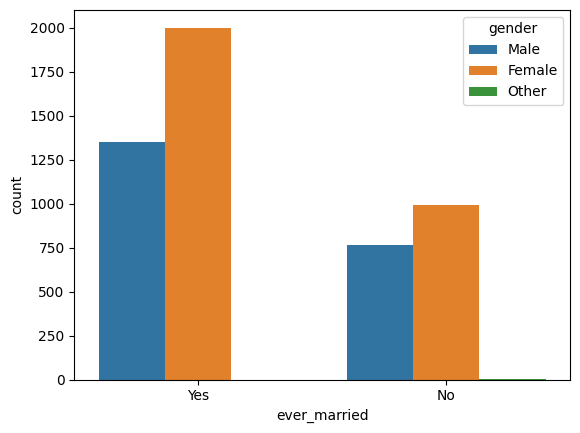

In [22]:
sns.countplot(data =df,x = 'ever_married',hue = 'gender')

<Axes: xlabel='work_type', ylabel='count'>

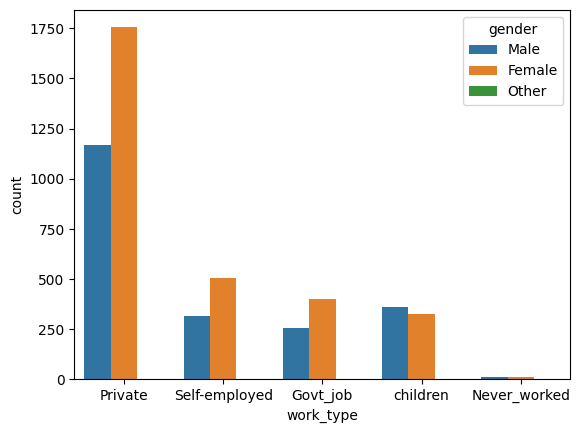

In [23]:
sns.countplot(data =df,x = 'work_type',hue = 'gender')

<Axes: xlabel='Residence_type', ylabel='count'>

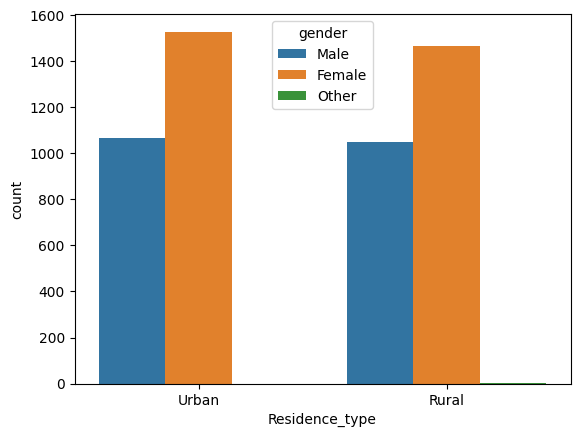

In [24]:
sns.countplot(data =df,x = 'Residence_type',hue = 'gender')

<Axes: xlabel='smoking_status', ylabel='count'>

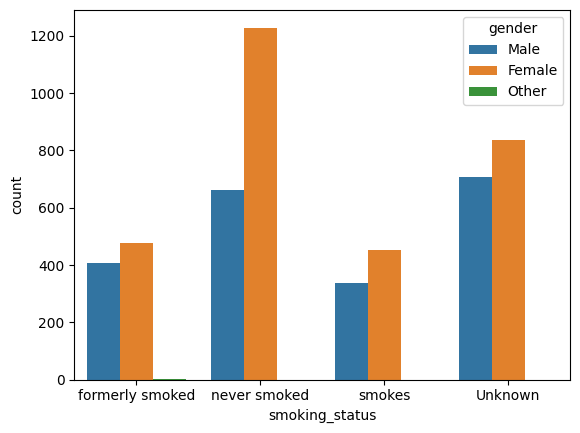

In [25]:
sns.countplot(data =df,x = 'smoking_status',hue = 'gender')

- From Here You added the charts to your ppt

<Axes: xlabel='age', ylabel='Density'>

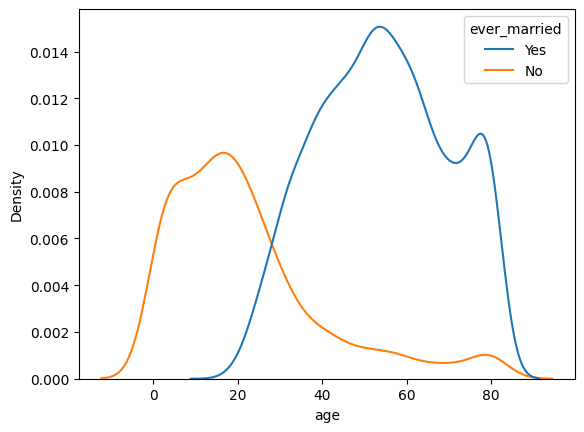

In [26]:
sns.kdeplot(data=df,x= 'age',hue='ever_married')

<Axes: xlabel='age', ylabel='Density'>

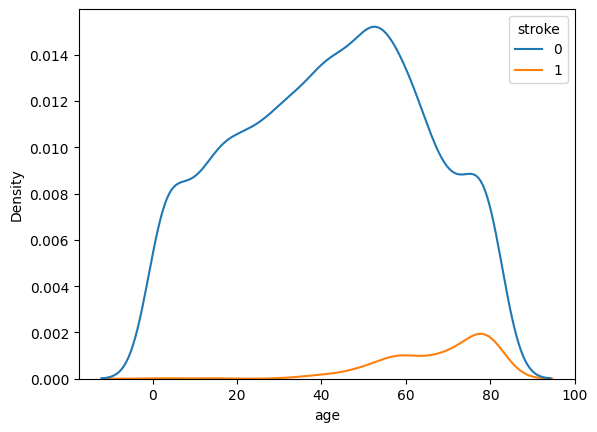

In [27]:
sns.kdeplot(data=df,x= 'age',hue='stroke')

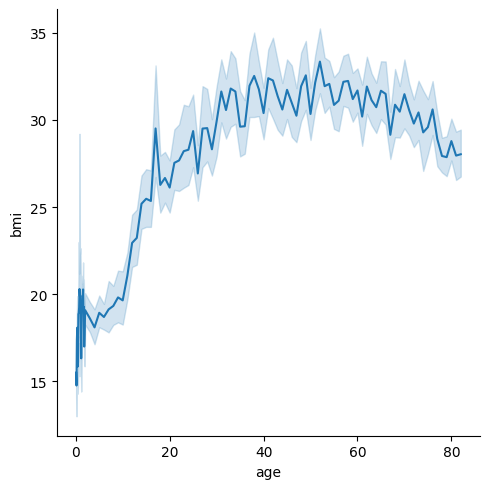

In [28]:
sns.relplot(data=df,x= 'age',y='bmi',kind='line')

<Axes: xlabel='age', ylabel='Density'>

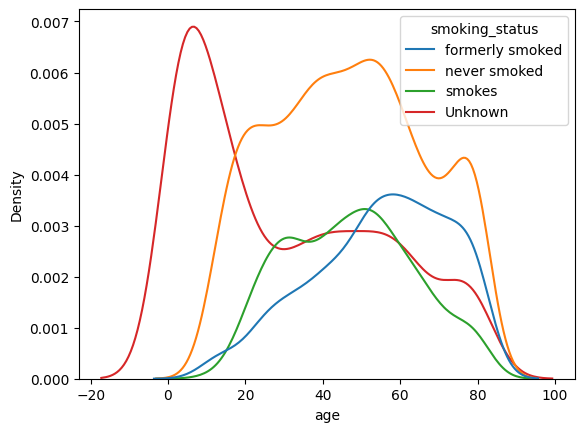

In [29]:
sns.kdeplot(data=df,x= 'age',hue='smoking_status')

<Axes: xlabel='age', ylabel='Density'>

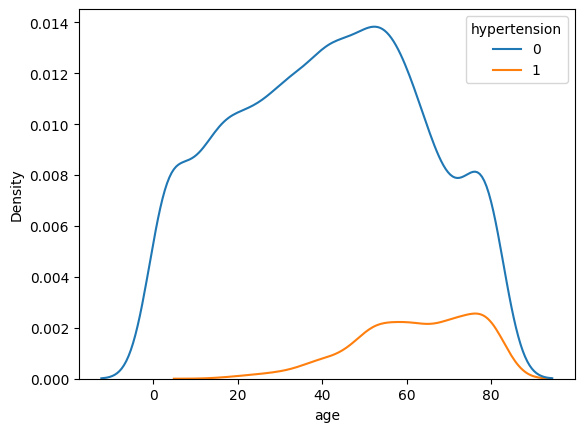

In [30]:
sns.kdeplot(data=df,x= 'age',hue='hypertension')

<Axes: xlabel='age', ylabel='Density'>

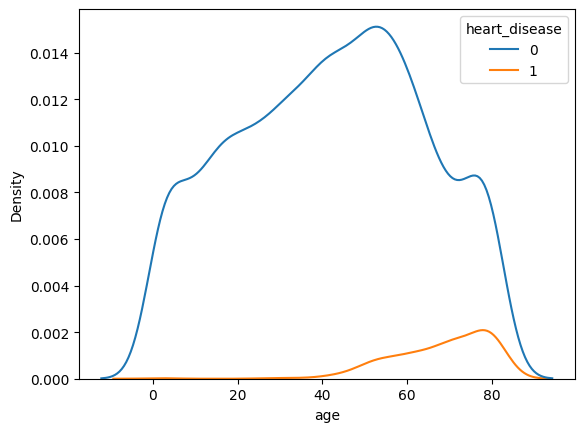

In [31]:
sns.kdeplot(data=df,x= 'age',hue='heart_disease')

<Axes: xlabel='bmi', ylabel='Density'>

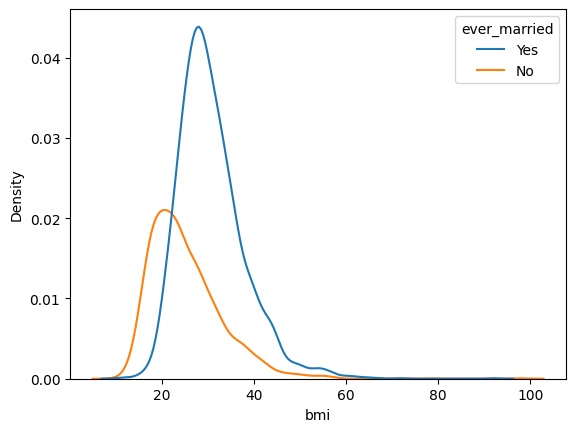

In [32]:
sns.kdeplot(data=df,x= 'bmi',hue='ever_married')

<Axes: xlabel='ever_married', ylabel='count'>

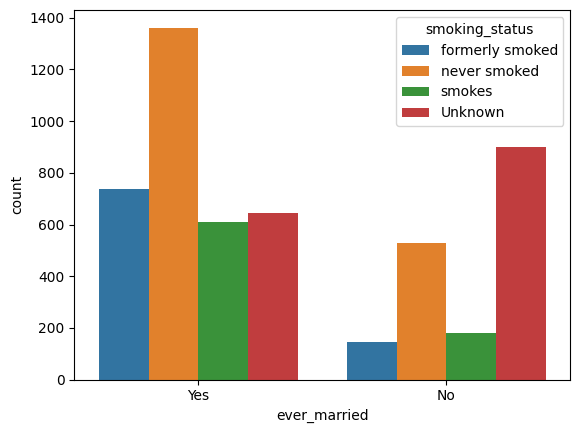

In [33]:
sns.countplot(data=df,x='ever_married',hue = 'smoking_status')

### Feature Engineering

##### Replacing a Missing values.

In [34]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [35]:
from sklearn.impute import KNNImputer

In [36]:
knn = KNNImputer()

In [37]:
df['bmi'] = knn.fit_transform(df['bmi'].values.reshape(-1,1))

In [38]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [39]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

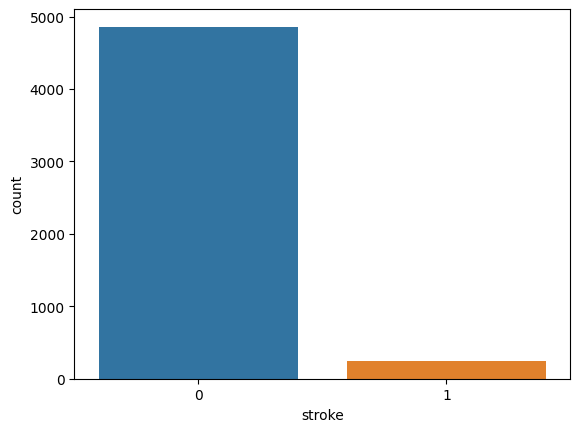

In [40]:
sns.countplot(data=df, x='stroke')


In [41]:
df.select_dtypes(include=int).columns

Index(['id', 'hypertension', 'heart_disease', 'stroke'], dtype='object')

In [42]:
for feature in list(df.select_dtypes(include=object).columns):
    print("-------------------------------------------------")
    print(f"the {feature} - >  {df[feature].value_counts()}")
    print('---------------------------------------------------')

-------------------------------------------------
the gender - >  gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
---------------------------------------------------
-------------------------------------------------
the ever_married - >  ever_married
Yes    3353
No     1757
Name: count, dtype: int64
---------------------------------------------------
-------------------------------------------------
the work_type - >  work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
---------------------------------------------------
-------------------------------------------------
the Residence_type - >  Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
---------------------------------------------------
-------------------------------------------------
the smoking_status - >  smoking_status
never smoked       1892
Unknown            1544
formerly smoked   

In [43]:
df['stroke'].value_counts()/len(df)*100

stroke
0    95.127202
1     4.872798
Name: count, dtype: float64

- The ratio is 95 : 4
So training a model on this data it may leads to biased model.

In [44]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [45]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [46]:
df.drop(['id'],axis=1,inplace=True)

In [47]:
for feature in list(df.select_dtypes(include=int).columns):
    print("-------------------------------------------------")
    print(f"  {df[feature].value_counts()}")
    print('---------------------------------------------------')

-------------------------------------------------
  gender
0    2994
1    2115
2       1
Name: count, dtype: int64
---------------------------------------------------
-------------------------------------------------
  hypertension
0    4612
1     498
Name: count, dtype: int64
---------------------------------------------------
-------------------------------------------------
  heart_disease
0    4834
1     276
Name: count, dtype: int64
---------------------------------------------------
-------------------------------------------------
  ever_married
1    3353
0    1757
Name: count, dtype: int64
---------------------------------------------------
-------------------------------------------------
  work_type
2    2925
3     819
4     687
0     657
1      22
Name: count, dtype: int64
---------------------------------------------------
-------------------------------------------------
  Residence_type
1    2596
0    2514
Name: count, dtype: int64
----------------------------------------

In [48]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (5110, 10)
Y Shape (5110,)


- 0 male
- 1 female 

----------------------------------------------------------

- yes = 1
- no = 0

-----------------------------------------------------------

- Private = 2    
- Self-employed = 3     
- children = 4     
- Govt_job = 0     
- Never_worked =  1     

-----------------------------------------------------------

- urban = 1
- rural = 0

-----------------------------------------------------------

- never smoked = 2    
- Unknown = 0    
- formerly smoked = 1     
- smokes = 3     

In [49]:
x

array([[  1.        ,  67.        ,   0.        , ..., 228.69      ,
         36.6       ,   1.        ],
       [  0.        ,  61.        ,   0.        , ..., 202.21      ,
         28.89323691,   2.        ],
       [  1.        ,  80.        ,   0.        , ..., 105.92      ,
         32.5       ,   2.        ],
       ...,
       [  0.        ,  35.        ,   0.        , ...,  82.99      ,
         30.6       ,   2.        ],
       [  1.        ,  51.        ,   0.        , ..., 166.29      ,
         25.6       ,   1.        ],
       [  0.        ,  44.        ,   0.        , ...,  85.28      ,
         26.2       ,   0.        ]])

In [50]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Number transations x_train df',x_train.shape)
print('Number transations x_test df',x_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (4088, 10)
Number transations x_test df (1022, 10)
Number transations y_train df (4088,)
Number transations y_test df (1022,)


In [52]:
print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, counts of label 1: 195
Before OverSampling, counts of label 0: 3893 



In [53]:
sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (7786, 10)
After OverSampling, the shape of train_y: (7786,)
After OverSampling, counts of label 1: 3893
After OverSampling, counts of label 0: 3893


In [54]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026109,-0.062581,0.008929
age,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257
hypertension,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904
heart_disease,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914
ever_married,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340
work_type,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458
avg_glucose_level,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945
bmi,-0.026109,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947
smoking_status,-0.062581,0.265199,0.111038,0.048460,0.259647,-0.305927,0.008237,0.063437,0.219148,1.000000,0.028123


<Axes: >

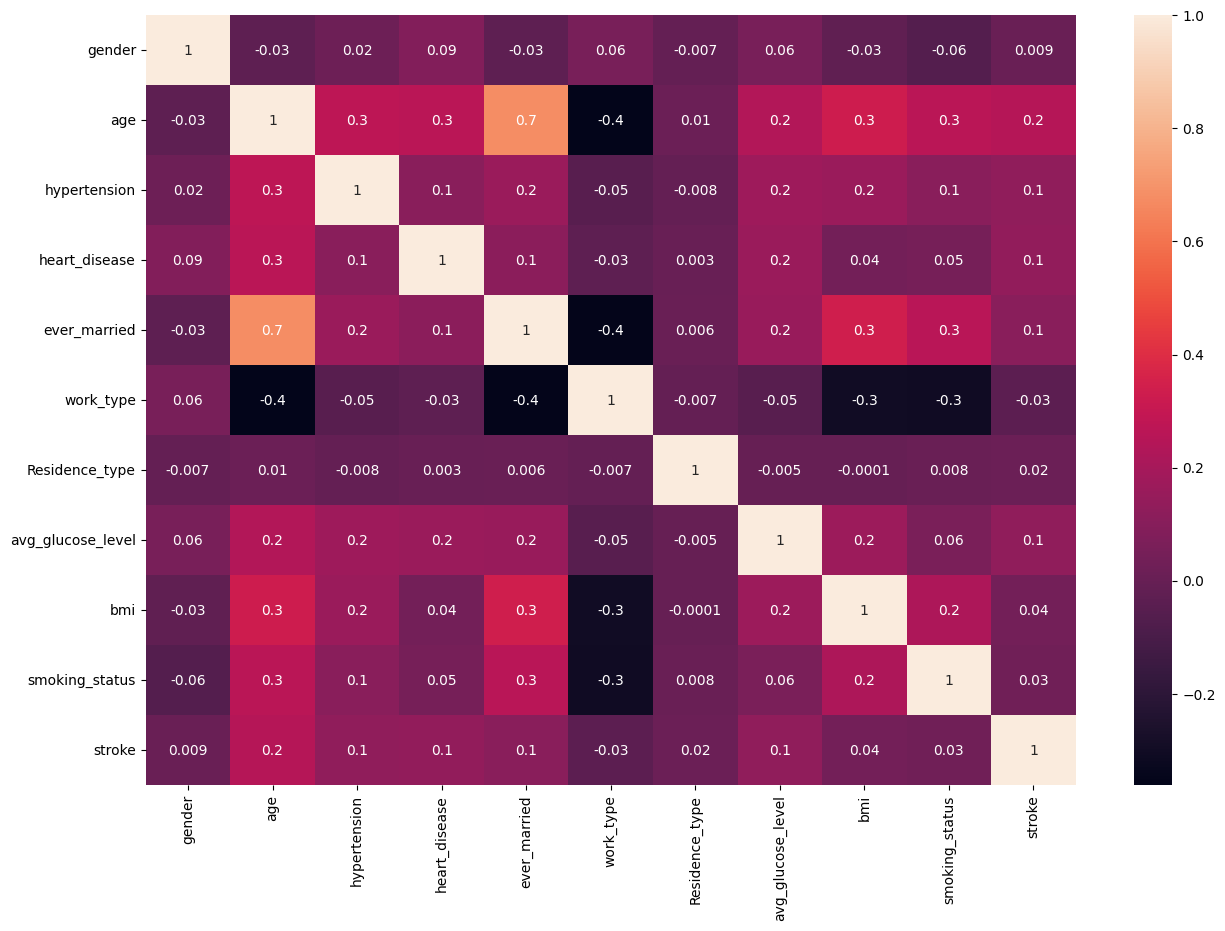

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.1g')

In [56]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [57]:
models = []
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])

In [58]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(x_train_res,y_train_res)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = x_train_res,y = y_train_res, cv=10)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('Average Accuracy Score: ',accuracies)
    print("---------------------------------------------------------------------------------------------------------------")
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_1.append(lst_2)

XGBClassifier :
[[965   3]
 [ 51   3]]
Accuracy Score:  0.9471624266144814

Average Accuracy Score:  [0.75609756 0.99486521 0.99486521 0.99614891 0.98844673 0.99101412
 0.99357326 0.99485861 0.99357326 0.98971722]
---------------------------------------------------------------------------------------------------------------
DecisionTree :
[[927  41]
 [ 44  10]]
Accuracy Score:  0.9168297455968689

Average Accuracy Score:  [0.78947368 0.96405648 0.96277279 0.97432606 0.96148909 0.95121951
 0.95758355 0.96915167 0.95501285 0.97686375]
---------------------------------------------------------------------------------------------------------------
RandomForest :
[[965   3]
 [ 53   1]]
Accuracy Score:  0.9452054794520548

Average Accuracy Score:  [0.76508344 0.99101412 0.9987163  0.99486521 0.99486521 0.99358151
 0.99228792 0.99614396 0.98843188 0.99742931]
---------------------------------------------------------------------------------------------------------------
AdaBoostClassifier :
[[9

In [59]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy',' Mean Accuracy'])

In [60]:
df2

,Model,Accuracy,Mean Accuracy
0,XGBClassifier,94.716243,96.931601
1,DecisionTree,91.682975,94.619494
2,RandomForest,94.520548,97.124189
3,AdaBoostClassifier,92.759295,95.197686


In [64]:
df2.columns

Index(['Model', 'Accuracy', ' Mean Accuracy'], dtype='object')

In [65]:
df2.sort_values(by=['Accuracy'],inplace=True,ascending=False)
df2

,Model,Accuracy,Mean Accuracy
0,XGBClassifier,94.716243,96.931601
2,RandomForest,94.520548,97.124189
3,AdaBoostClassifier,92.759295,95.197686
1,DecisionTree,91.682975,94.619494


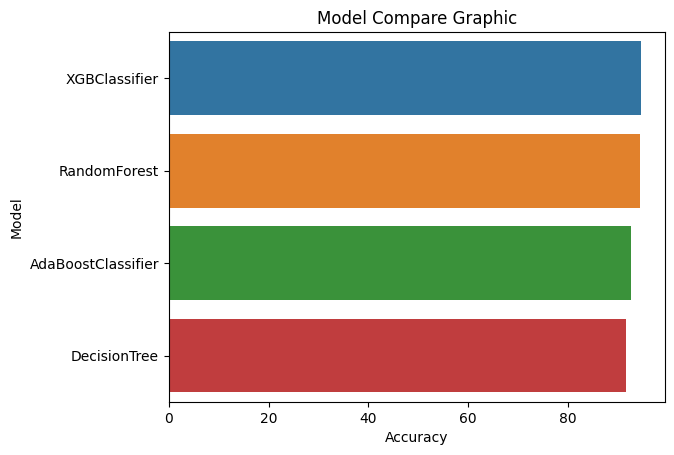

In [66]:
sns.barplot(x='Accuracy',y='Model',data=df2)
plt.title('Model Compare Graphic');

In [67]:
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)

In [68]:
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(cm)


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.50      0.06      0.10        54

    accuracy                           0.95      1022
   macro avg       0.72      0.53      0.54      1022
weighted avg       0.93      0.95      0.93      1022

[[965   3]
 [ 51   3]]


In [69]:
import pickle
pickle_out=open('classifier.pkl', mode='wb')
pickle.dump(classifier, pickle_out)
pickle_out.close()